In [1]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
import matplotlib as mpl
from IPython.display import Image
from yt.units import G
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve_fft, Gaussian2DKernel
from matplotlib.colors import LogNorm
plt.rcParams['text.usetex'] = True
%matplotlib inline

In [2]:
DDname = 'DD0600'

In [3]:
ds_n = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_selfshield_z15/%s/%s'%(DDname, DDname))
ds_f = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_nref10f_selfshield_z6/%s/%s'%(DDname, DDname))

ad_n = ds_n.all_data()
ad_f = ds_f.all_data()

yt : [INFO     ] 2019-02-06 17:01:18,302 Parameters: current_time              = 183.06652781829
yt : [INFO     ] 2019-02-06 17:01:18,303 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-02-06 17:01:18,304 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-06 17:01:18,305 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-02-06 17:01:18,305 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-06 17:01:18,306 Parameters: current_redshift          = 1.6720386378662
yt : [INFO     ] 2019-02-06 17:01:18,306 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-02-06 17:01:18,307 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-02-06 17:01:18,308 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2019-02-06 17:01:18,345 Parameters: current_time              = 183.06652781829
yt : [INFO     ] 2019-02-06 17:01:18,346 Parameters: domain_dimensions         = [256 

In [4]:
gp_n = np.load('/Users/rsimons/Dropbox/rcs_foggie/galprops/halo_008508/nref11n_selfshield_z15_%s_galprops.npy'%DDname, encoding = 'latin1')[()]
gp_f = np.load('/Users/rsimons/Dropbox/rcs_foggie/galprops/halo_008508/nref11n_nref10f_selfshield_z6_%s_galprops.npy'%DDname, encoding = 'latin1')[()]

In [5]:
gas_vx_n_o = ad_n['gas', 'velocity_x']
gas_vy_n_o = ad_n['gas', 'velocity_y']
gas_vz_n_o = ad_n['gas', 'velocity_z']

gas_x_n_o = ad_n['gas', 'x']
gas_y_n_o = ad_n['gas', 'y']
gas_z_n_o = ad_n['gas', 'z']

gas_vx_f_o = ad_f['gas', 'velocity_x']
gas_vy_f_o = ad_f['gas', 'velocity_y']
gas_vz_f_o = ad_f['gas', 'velocity_z']

gas_x_f_o = ad_f['gas', 'x']
gas_y_f_o = ad_f['gas', 'y']
gas_z_f_o = ad_f['gas', 'z']

gas_dn_n_o = ad_n['gas', 'density']
gas_dn_f_o = ad_f['gas', 'density']



Parsing Hierarchy : 100%|██████████| 1177/1177 [00:00<00:00, 5202.39it/s]
yt : [INFO     ] 2019-02-06 17:01:39,474 Gathering a field list (this may take a moment.)
Parsing Hierarchy : 100%|██████████| 4254/4254 [00:00<00:00, 5918.63it/s]
yt : [INFO     ] 2019-02-06 17:01:53,320 Gathering a field list (this may take a moment.)


In [7]:
gas_x_n_gal = gas_x_n_o - yt.YTArray(gp_n['stars_center'][0][0], 'kpc')
gas_y_n_gal = gas_y_n_o - yt.YTArray(gp_n['stars_center'][0][1], 'kpc')
gas_z_n_gal = gas_z_n_o - yt.YTArray(gp_n['stars_center'][0][2], 'kpc')

gas_x_f_gal = gas_x_f_o - yt.YTArray(gp_f['stars_center'][0][0], 'kpc')
gas_y_f_gal = gas_y_f_o - yt.YTArray(gp_f['stars_center'][0][1], 'kpc')
gas_z_f_gal = gas_z_f_o - yt.YTArray(gp_f['stars_center'][0][2], 'kpc')



gas_vx_n_gal = gas_vx_n_o
gas_vy_n_gal = gas_vy_n_o
gas_vz_n_gal = gas_vz_n_o

gas_vx_f_gal = gas_vx_f_o
gas_vy_f_gal = gas_vy_f_o
gas_vz_f_gal = gas_vz_f_o




r_n_gal = sqrt(gas_x_n_gal**2. + gas_y_n_gal**2. + gas_z_n_gal**2.).to('kpc')
r_f_gal = sqrt(gas_x_f_gal**2. + gas_y_f_gal**2. + gas_z_f_gal**2.).to('kpc')

gas_v_n_gal_o = sqrt(gas_vx_n_gal**2. + gas_vy_n_gal**2. + gas_vz_n_gal**2.)
gas_v_f_gal_o = sqrt(gas_vx_f_gal**2. + gas_vy_f_gal**2. + gas_vz_f_gal**2.)




In [12]:
dx1_o = ad_n['gas', 'dx']
dx2_o = ad_f['gas', 'dx']

A1_o = dx1_o**3.
A2_o = dx2_o**3.

In [17]:
gas_v_n_gal = gas_v_n_gal_o[r_n_gal < 100] 
gas_v_f_gal = gas_v_f_gal_o[r_f_gal < 100]
gas_p_n_gal = r_n_gal[r_n_gal < 100]
gas_p_f_gal = r_f_gal[r_f_gal < 100]

An = A1_o[r_n_gal < 100]
Af = A2_o[r_f_gal < 100]

gas_dn_n = gas_dn_n_o[r_n_gal < 100]
gas_dn_f = gas_dn_f_o[r_f_gal < 100]


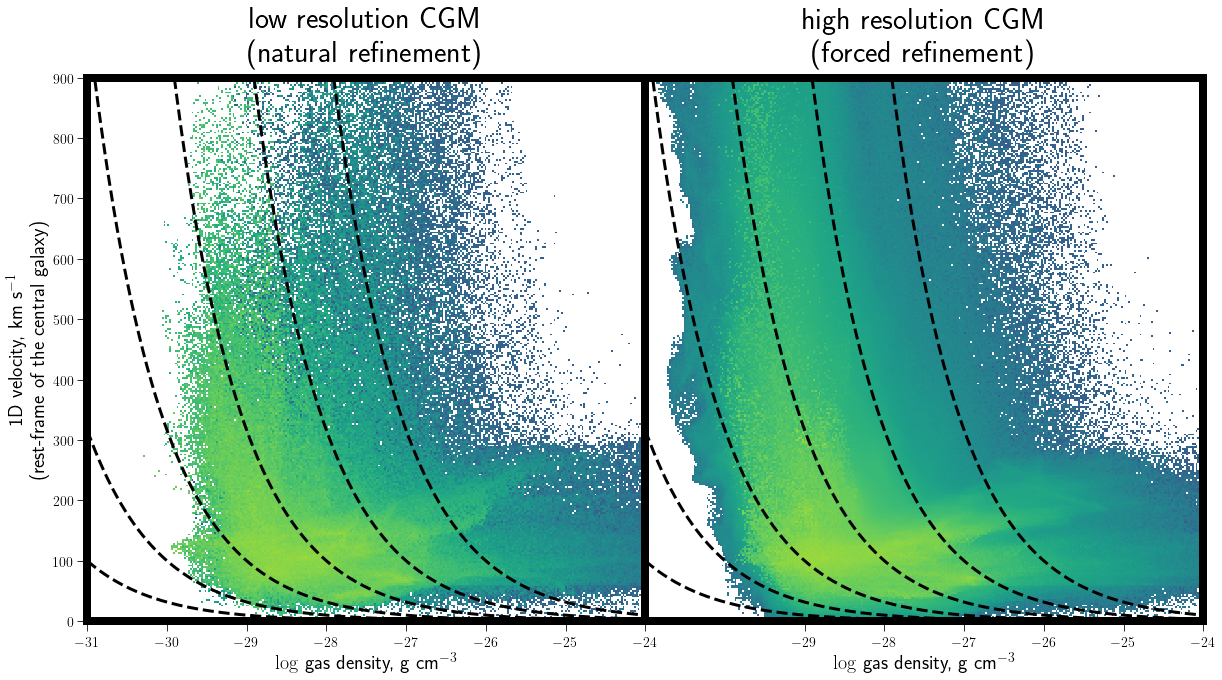

In [41]:
mpl.rcParams['axes.linewidth'] = 8
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10


fig, axes = plt.subplots(1,2, figsize = (20,10))

mnv = 0 
mxv = 900
mnd = -31
mxd = -24
bns = 300


P1 = (gas_v_n_gal/sqrt(3))**2. * gas_dn_n
P2 = (gas_v_f_gal/sqrt(3))**2. * gas_dn_f



#stf = axes[1].hist2d(log10(gas_dn_2),gas_v_2_gal/sqrt(3), weights = A2, norm = LogNorm(), bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])


for ax in axes:
    ax.set_xlabel('$\log$ gas density, g cm$^{-3}$', fontsize = 20)

axes[0].set_ylabel('1D velocity, km s$^{-1}$ \n(rest-frame of the central galaxy)', fontsize = 20)
axes[1].set_ylabel('')

axes[1].set_yticks([])

Ps = yt.YTArray([1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12], 'dyn/cm**2')

dns = yt.YTArray([1.*10**d for d in linspace(-31, -23, 300)], 'g/cm**3')


    
    
for ax in axes.ravel():
    ax.set_xlim(mnd, mxd)
    ax.set_ylim(mnv, mxv)
    
    
#cbar = plt.colorbar(im2[3], ax = axes[1])
fig.subplots_adjust(wspace = 0.0)

fig.savefig('velocity_density_nothing.png', dpi = 300)


for P in Ps:
    vs = sqrt(P/(dns)).to('km/s')
    axes[0].plot(log10(dns), vs, 'k--', linewidth = 3)    
    axes[1].plot(log10(dns), vs, 'k--', linewidth = 3)    

fig.savefig('velocity_density_wlines.png', dpi = 300)
    
    
vmn = 1.e-12
vmx = 5.e-1
im1 = axes[0].hist2d(log10(gas_dn_n),gas_v_n_gal.to('km/s')/sqrt(3), weights = An,normed = True, norm = LogNorm(), vmin = vmn, vmax = vmx, bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])
im2 = axes[1].hist2d(log10(gas_dn_f),gas_v_f_gal.to('km/s')/sqrt(3), weights = Af,normed = True, norm = LogNorm(), vmin = vmn, vmax = vmx,bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])


axes[0].set_title('low resolution CGM \n(natural refinement)', fontsize = 30, pad = 15)
axes[1].set_title('high resolution CGM \n(forced refinement)', fontsize = 30, pad = 15)


axes[1].set_xticks(arange(-29, -23))


#cbar.ax.tick_params(labelsize = 20)

cbar.set_label('volume', fontsize = 20)


fig.savefig('velocity_density_full.png', dpi = 300)


    


In [20]:
log10(gas_dn_f)

array([-28.85813218, -28.85842669, -28.85816284, ..., -29.06114239,
       -29.01794692, -28.9888003 ])

In [27]:
gas_v_n_gal.to('km/s')

YTArray([160.18628522, 161.74945706, 162.13821373, ..., 561.1321574 ,
         256.94783992, 290.32827364]) km/s